<a href="https://colab.research.google.com/github/dayanamariyathomas/Dayana_portfolio/blob/main/Competition_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Train Data preprocessing

In [216]:
dftr=pd.read_csv("/content/drive/MyDrive/train_ctrUa4K.csv")
dftr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [217]:
dftr.shape

(614, 13)

In [218]:
dftr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [219]:
dftr.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
dftr['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [221]:
dftr['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [222]:
dftr['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [223]:
dftr['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [224]:
dftr['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [225]:
dftr['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [226]:
dftr['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [227]:
dftr['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [228]:
for feature in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    print(feature,'\nMean \n',dftr.groupby('Loan_Status')[feature].mean(),'\n')
    print('Median \n',dftr.groupby('Loan_Status')[feature].median(),'\n')

ApplicantIncome 
Mean 
 Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64 

Median 
 Loan_Status
N    3833.5
Y    3812.5
Name: ApplicantIncome, dtype: float64 

CoapplicantIncome 
Mean 
 Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64 

Median 
 Loan_Status
N     268.0
Y    1239.5
Name: CoapplicantIncome, dtype: float64 

LoanAmount 
Mean 
 Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64 

Median 
 Loan_Status
N    129.0
Y    126.0
Name: LoanAmount, dtype: float64 



In [229]:
dftr.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [230]:
dftr.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [231]:
dftr.describe(include="object").T 

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


Handling missing values

In [232]:
dftr['Gender'].fillna(dftr['Gender'].mode()[0], inplace=True)
dftr['Married'].fillna(dftr['Married'].mode()[0], inplace=True)
dftr['Dependents'].fillna(dftr['Dependents'].mode()[0], inplace=True)
dftr['Self_Employed'].fillna(dftr['Self_Employed'].mode()[0], inplace=True)
dftr['Credit_History'].fillna(dftr['Credit_History'].mode()[0], inplace=True)
dftr['Loan_Amount_Term'].fillna(dftr['Loan_Amount_Term'].mode()[0], inplace=True)

In [233]:
dftr['LoanAmount'].fillna(dftr['LoanAmount'].median(), inplace=True)

In [234]:
dftr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Splitting databases into categorical and numerical

In [235]:
num_data=dftr.select_dtypes(include=['int64','float64'])
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [236]:
cat_data=dftr.select_dtypes(include=['object'])
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [237]:
for i,feature in enumerate(cat_data):
    print(dftr.groupby([feature,'Loan_Status'])['Loan_Status'].count())

Loan_ID   Loan_Status
LP001002  Y              1
LP001003  N              1
LP001005  Y              1
LP001006  Y              1
LP001008  Y              1
                        ..
LP002978  Y              1
LP002979  Y              1
LP002983  Y              1
LP002984  Y              1
LP002990  N              1
Name: Loan_Status, Length: 614, dtype: int64
Gender  Loan_Status
Female  N               37
        Y               75
Male    N              155
        Y              347
Name: Loan_Status, dtype: int64
Married  Loan_Status
No       N               79
         Y              134
Yes      N              113
         Y              288
Name: Loan_Status, dtype: int64
Dependents  Loan_Status
0           N              113
            Y              247
1           N               36
            Y               66
2           N               25
            Y               76
3+          N               18
            Y               33
Name: Loan_Status, dtype: int64
Educati

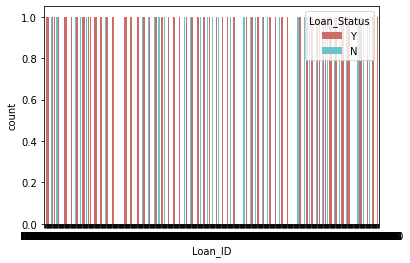

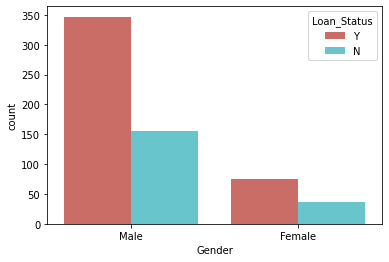

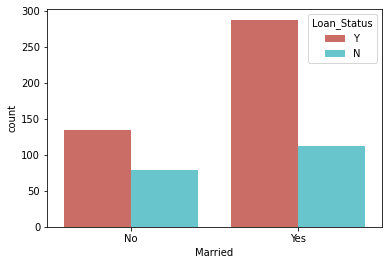

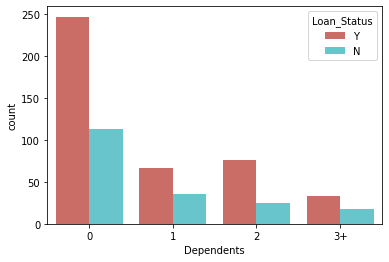

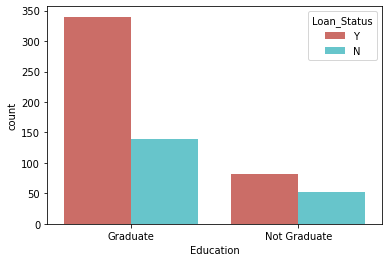

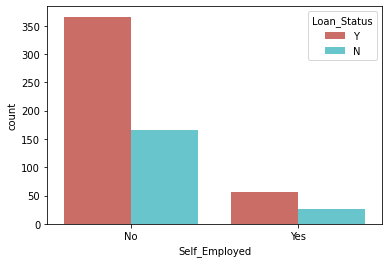

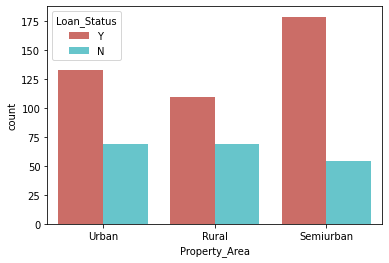

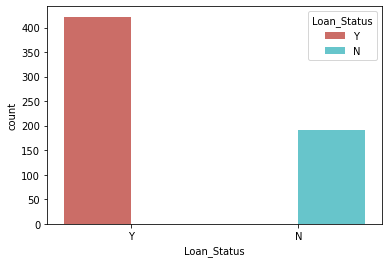

In [238]:
for i,feature in enumerate(cat_data):
    plt.figure(i)
    sns.countplot(x=feature,data=dftr,hue='Loan_Status',palette='hls')

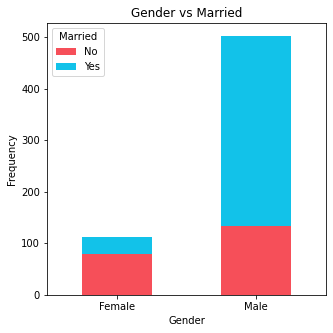

In [239]:
pd.crosstab(dftr.Gender,dftr.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

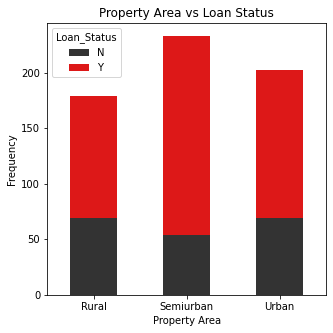

In [240]:
pd.crosstab(dftr.Property_Area,dftr.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [241]:
dftr['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [242]:
dftr['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [243]:
org_data=dftr.copy()

Label Encoding the Categorical data

In [244]:
from scipy import stats
#data preprocessing
from sklearn.preprocessing import LabelEncoder

In [245]:
le=LabelEncoder()

dftr['Loan_ID']=le.fit_transform(dftr['Loan_ID'])
dftr['Gender']=le.fit_transform(dftr['Gender'])
dftr['Married']=le.fit_transform(dftr['Married'])
dftr['Dependents']=le.fit_transform(dftr['Dependents'])
dftr['Education']=le.fit_transform(dftr['Education'])
dftr['Self_Employed']=le.fit_transform(dftr['Self_Employed'])
dftr['Property_Area']=le.fit_transform(dftr['Property_Area'])
dftr['Loan_Status']=le.fit_transform(dftr['Loan_Status'])
dftr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [246]:
Q1 = dftr.quantile(0.25)
Q3 = dftr.quantile(0.75)
IQR = Q3 - Q1

df = dftr[~((dftr < (Q1 - 1.5 * IQR)) |(dftr > (Q3 + 1.5 * IQR))).any(axis=1)]

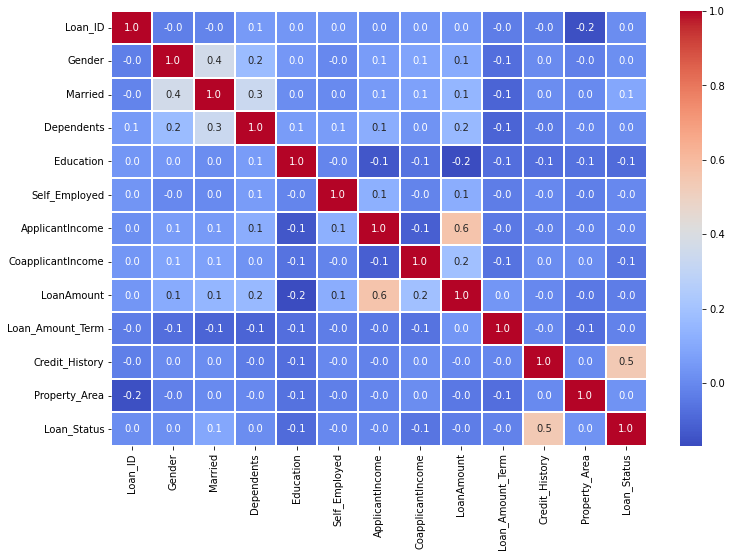

In [247]:
plt.figure(figsize=(12,8))
sns.heatmap(dftr.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Test Data Preprocessing

In [248]:
dfte=pd.read_csv("/content/drive/MyDrive/test_lAUu6dG.csv")
dfte.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [249]:
dfte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Handling Null

In [250]:
dfte.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [251]:
dfte['Gender'].fillna(dftr['Gender'].mode()[0], inplace=True)
dfte['Self_Employed'].fillna(dftr['Self_Employed'].mode()[0], inplace=True)
dfte['Credit_History'].fillna(dftr['Credit_History'].mode()[0], inplace=True)
dfte['Loan_Amount_Term'].fillna(dftr['Loan_Amount_Term'].mode()[0], inplace=True)
dfte['LoanAmount'].fillna(dftr['LoanAmount'].mode()[0], inplace=True)
dfte['Credit_History'].fillna(dftr['Credit_History'].mode()[0], inplace=True)

In [252]:
dfte=dfte.dropna()
dfte.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [253]:
dfte.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [254]:
dfte['Gender'].value_counts()

Male      279
Female     68
1          10
Name: Gender, dtype: int64

In [255]:
dfte['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [256]:
dfte['Self_Employed'].value_counts()

No     298
Yes     36
0       23
Name: Self_Employed, dtype: int64

In [257]:
dfte.Self_Employed =dfte.Self_Employed.replace({"Yes": 1, "No" : 0})

In [258]:
dfte.describe()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,0.10084,4793.602241,1587.098039,136.535014,343.282913,0.834734
std,0.30154,4936.879103,2357.321156,61.498032,64.015457,0.371942
min,0.00000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.00000,2858.000000,0.000000,102.000000,360.000000,1.000000
50%,0.00000,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,0.00000,5062.000000,2458.000000,158.000000,360.000000,1.000000
max,1.00000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [259]:
dfte.corr()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Self_Employed,1.000000,0.056255,-0.023839,0.070397,-0.032914,0.098919
ApplicantIncome,0.056255,1.000000,-0.106478,0.489293,0.016227,0.094933
CoapplicantIncome,-0.023839,-0.106478,1.000000,0.147755,-0.005917,-0.055082
LoanAmount,0.070397,0.489293,0.147755,1.000000,0.088054,-0.009386
Loan_Amount_Term,-0.032914,0.016227,-0.005917,0.088054,1.000000,-0.046283
Credit_History,0.098919,0.094933,-0.055082,-0.009386,-0.046283,1.000000


In [260]:
dfte.describe(include="object").T

,count,unique,top,freq
Loan_ID,357,357,LP001015,1
Gender,357,3,Male,279
Married,357,2,Yes,228
Dependents,357,4,0,200
Education,357,2,Graduate,274
Property_Area,357,3,Urban,136


Splitting Databases

In [261]:
num_data=dfte.select_dtypes(include=['int64','float64'])
num_data.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5720,0,110.0,360.0,1.0
1,0,3076,1500,126.0,360.0,1.0
2,0,5000,1800,208.0,360.0,1.0
3,0,2340,2546,100.0,360.0,1.0
4,0,3276,0,78.0,360.0,1.0


In [262]:
cat_data=dfte.select_dtypes(include=['object'])
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Property_Area
0,LP001015,Male,Yes,0,Graduate,Urban
1,LP001022,Male,Yes,1,Graduate,Urban
2,LP001031,Male,Yes,2,Graduate,Urban
3,LP001035,Male,Yes,2,Graduate,Urban
4,LP001051,Male,No,0,Not Graduate,Urban


In [263]:
org_data=dfte.copy()

In [264]:
dfte.Gender = dfte.Gender.replace({"Male": 1, "Female" : 0})

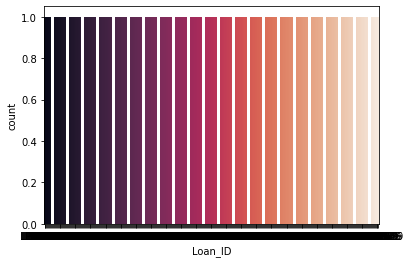

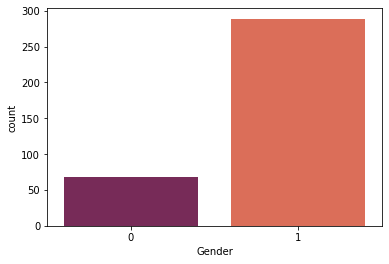

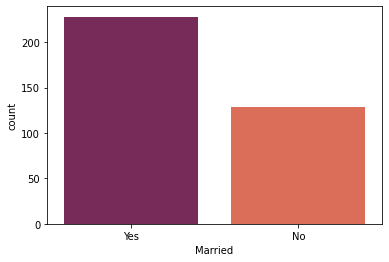

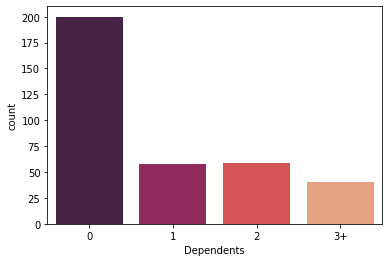

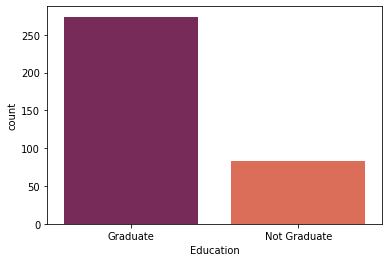

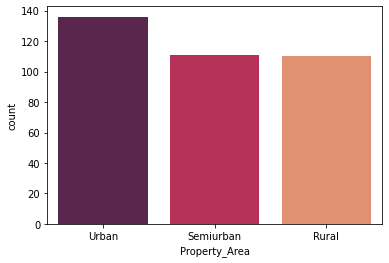

In [265]:
for i,feature in enumerate(cat_data):
    plt.figure(i)
    sns.countplot(x=feature,data=dfte,palette='rocket')

Label Encoding

In [266]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [267]:
le=LabelEncoder()

dfte['Loan_ID']=le.fit_transform(dfte['Loan_ID'])
dfte['Gender']=le.fit_transform(dfte['Gender'])
dfte['Married']=le.fit_transform(dfte['Married'])
dfte['Dependents']=le.fit_transform(dfte['Dependents'])
dfte['Education']=le.fit_transform(dfte['Education'])
dfte['Self_Employed']=le.fit_transform(dfte['Self_Employed'])
dfte['Property_Area']=le.fit_transform(dfte['Property_Area'])
dfte.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


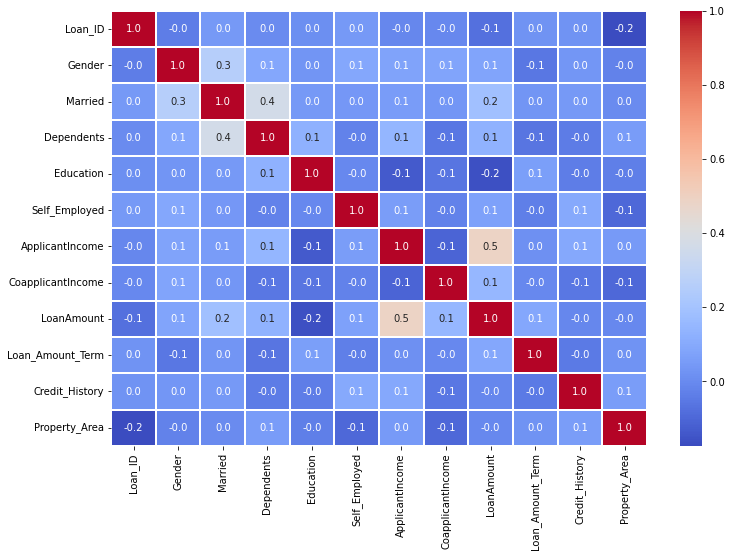

In [268]:
plt.figure(figsize=(12,8))
sns.heatmap(dfte.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Applying Supervised Learning

In [269]:
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [270]:
X = dftr.drop(["Loan_Status"], axis=1)
y = dftr["Loan_Status"]

In [271]:
X = MinMaxScaler().fit_transform(X)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Logistic regression

In [273]:
#creating the model
log_model = LogisticRegression(random_state=0)

In [274]:
#fitting the model
log_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [275]:
# Predicting the model for testing data
y_pred = log_model.predict(X_test)

In [276]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

[[14 19]
 [ 2 88]]


In [277]:
# Accuray Score
score = log_model.score(X_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8044806517311609
accuracy_score percent : 80.45


KNN

In [279]:
knn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    knn.append(KNclassifier.score(X_test, y_test))

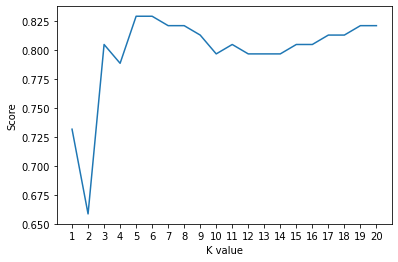

In [280]:
plt.plot(range(1,21), knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [281]:
KNscore = max(knn)
print("KNN best accuracy: {:.2f}%".format(KNscore*100))

KNN best accuracy: 82.93%


SVM

In [282]:
SVCclf = SVC(kernel='rbf', max_iter=500)
SVCclf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=500)

In [283]:
y_pred_svm = SVCclf.predict(X_test)

In [284]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123

[[14 19]
 [ 2 88]]


In [285]:
from sklearn.metrics import accuracy_score
SVCscore = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCscore*100))

SVC accuracy: 82.93%


Decision Tree

In [287]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

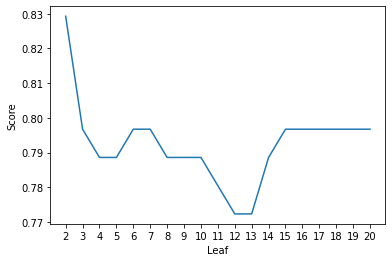

In [288]:
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()

In [289]:
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Decision Tree Accuracy: 82.93%


Random Forest

In [290]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

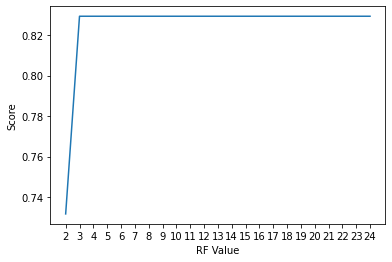

In [291]:
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()

In [292]:
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Random Forest Accuracy:  82.93%


In [298]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Decision Tree','Random Forest'], 'Accuracy': [score*100, KNscore*100, SVCscore*100, 
DTAcc*100, RFAcc*100]})
compare_df=compare.sort_values(by='Accuracy', ascending=False)
compare_df

,Model,Accuracy
1,K Neighbors,82.926829
2,SVM,82.926829
3,Decision Tree,82.926829
4,Random Forest,82.926829
0,Logistic Regression,80.651731


Sample Submission

In [294]:
sampledf=pd.read_csv("/content/drive/MyDrive/sample_submission_49d68Cx.csv")

In [295]:
sampledf.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
